In [222]:
import os
import cv2, matplotlib
from glob import glob
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm
%matplotlib inline

In [147]:
DATA_PATH='/home/bfortuner/workplace/deepcolor/'
IMAGES_PATH=DATA_PATH+'imgs/'
RESULTS_PATH=DATA_PATH+'results/'
EDGES_PATH=DATA_PATH+'edges/'

## View Images

In [219]:
def get_paths_to_files(dir_path):
    filepaths = []
    fnames = []
    for (dirpath, dirnames, filenames) in os.walk(dir_path):
        filepaths.extend(os.path.join(dirpath, f) for f in filenames)
        fnames.extend([f for f in filenames])
    return filepaths, fnames

def get_random_image_path(dir_path):
    filepaths = get_paths_to_files(dir_path)[0]
    return filepaths[random.randrange(len(filepaths))]

print (get_random_image_path(IMAGES_PATH))

/home/bfortuner/workplace/deepcolor/imgs/1422.jpg


In [216]:
fpaths, fnames = get_paths_to_files(IMAGES_PATH)

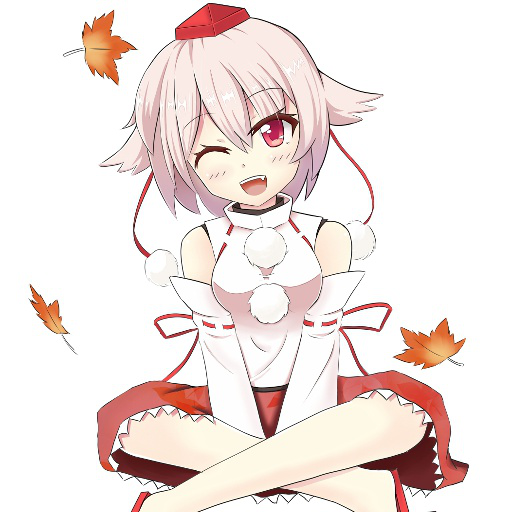

In [20]:
# View image with PIL
img_path = get_random_image_path(IMAGES_PATH)
img = Image.open(img_path)
img

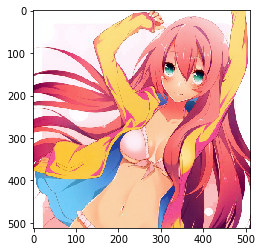

In [85]:
# Plot numpy array image
def plot_img_array(img_arr):
    plt.imshow(img_arr.astype('uint8'))
    plt.show()

img = load_img(img_path)
img_arr = img_to_array(img)
plot_img_array(img_arr)

## Process Images

In [21]:
pic = cv2.imread(img_path)

In [7]:
def get_image(image_path):
    return transform(imread(image_path))

def transform(image, npx=512, is_crop=True):
    cropped_image = cv2.resize(image, (256,256))

    return np.array(cropped_image)

def imread(path):
    readimage = cv2.imread(path, 1)
    return readimage

In [41]:
ims("base_line.jpg",base_edge) #, [self.batch_size_sqrt, self.batch_size_sqrt]))

saving img base_line.jpg


## Canny Edge Detector

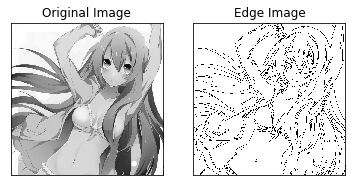

In [51]:
img_path = get_random_image_path(IMAGES_PATH)
img = cv2.imread(img_path,0)
edges = cv2.Canny(img,100,200)
edges = np.invert(edges)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [45]:
np.array(edges)

array([[255, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [60]:
np.random.seed(0)

## Clean Edge Extraction

* http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

In [223]:
def extract_edge(imname, blur=False, median=False, bilateral=False):
    #cimg = cv2.imread(imname,1)
    #cimg = np.fliplr(cimg.reshape(-1,3)).reshape(cimg.shape)
    #cimg = cv2.resize(cimg, (256,256))

    img = cv2.imread(imname,0)
    if blur:
        img = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise
    if median:
        img = cv2.medianBlur(img,5)
    if bilateral:
        img = cv2.bilateralFilter(img,9,75,75)

    # img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_edge = cv2.adaptiveThreshold(img, 255,
                                     cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY,
                                     blockSize=9,
                                     C=2)
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
    
    return img_edge

def extract_all(dir_path):
    fpaths,fnames = get_paths_to_files(dir_path)
    for i in tqdm(range(len(fpaths))):
        edge = extract_edge(fpaths[i], median=True, blur=True)    
        cv2.imwrite(EDGES_PATH+fnames[i]+"_edge.png", edge)

In [224]:
extract_all(IMAGES_PATH)

100%|██████████| 4162/4162 [00:22<00:00, 184.29it/s]


In [199]:
img_path = get_random_image_path(IMAGES_PATH)

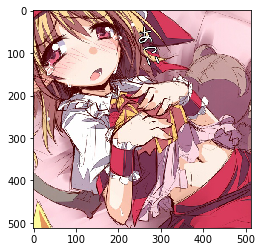

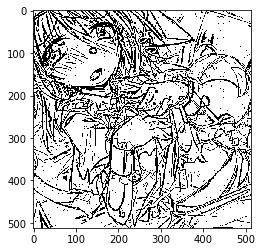

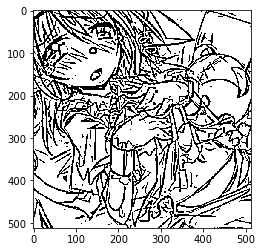

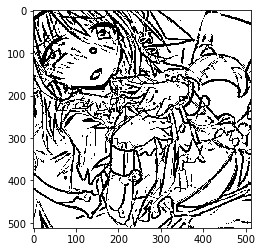

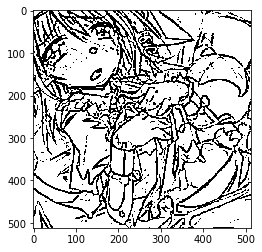

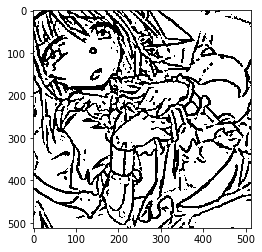

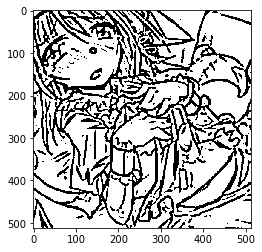

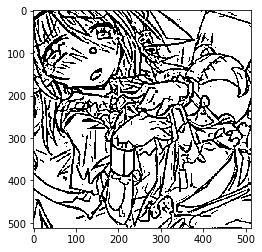

In [200]:
img = load_img(img_path)
img_arr = img_to_array(img)
plot_img_array(img_arr)
edge = extract_edge(img_path)
plot_img_array(edge)
edge = extract_edge(img_path, blur=True)
plot_img_array(edge)
edge = extract_edge(img_path, bilateral=True)
plot_img_array(edge)
edge = extract_edge(img_path, median=True)
plot_img_array(edge)
edge = extract_edge(img_path, bilateral=True, median=True)
plot_img_array(edge)
edge = extract_edge(img_path, bilateral=True, blur=True)  #my favorite?
plot_img_array(edge)
edge = extract_edge(img_path, median=True, blur=True)  #or this one
plot_img_array(edge)

In [185]:
def plot_edge(imname, blur=False, median=False, bilateral=False):
    cimg = cv2.imread(imname,1)
    cimg = np.fliplr(cimg.reshape(-1,3)).reshape(cimg.shape)
    cimg = cv2.resize(cimg, (256,256))

    img = cv2.imread(imname,0)

    # kernel = np.ones((5,5),np.float32)/25
    seg = np.ones_like(cimg)

    num_segs = 8
    seg_len = 256//num_segs

    for x in range(num_segs):
        for y in range(num_segs):
            seg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 0] = np.average(cimg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 0])
            seg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 1] = np.average(cimg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 1])
            seg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 2] = np.average(cimg[x*seg_len:(x+1)*seg_len, y*seg_len:(y+1)*seg_len, 2])

    if blur:
        img = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise
    if median:
        img = cv2.medianBlur(img,5)
    if bilateral:
        img = cv2.bilateralFilter(img,9,75,75)

    # img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_edge = cv2.adaptiveThreshold(img, 255,
                                     cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY,
                                     blockSize=9,
                                     C=2)
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
     #img_cartoon = cv2.bitwise_and(img, img_edge)

    plt.subplot(131),plt.imshow(cimg)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(132),plt.imshow(seg)
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(133),plt.imshow(img_edge,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()
    return img_edge

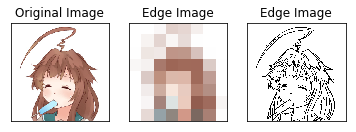

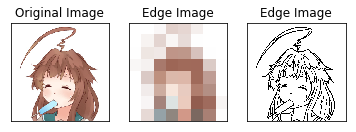

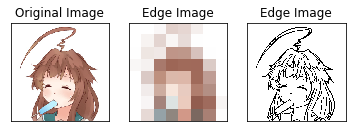

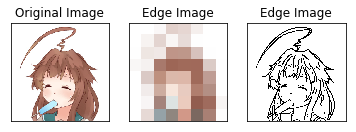

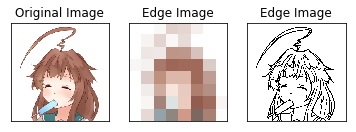

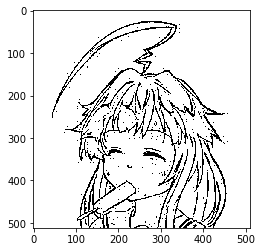

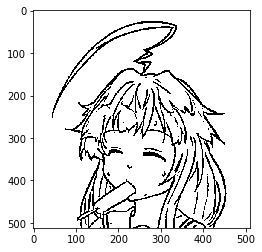

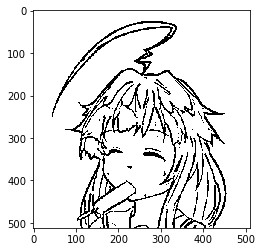

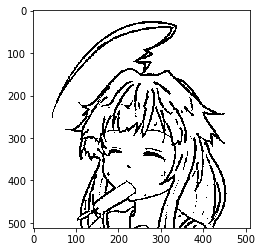

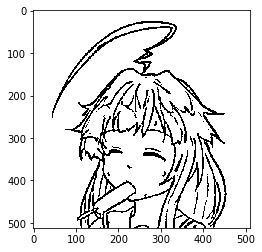

True

In [186]:
noblur_edge = plot_edge(IMAGES_PATH+"4.jpg")
blur_edge = plot_edge(IMAGES_PATH+"4.jpg",blur=True)
median_edge = plot_edge(IMAGES_PATH+"4.jpg",median=True)
bilateral_edge = plot_edge(IMAGES_PATH+"4.jpg",bilateral=True)
all_edge = plot_edge(IMAGES_PATH+"4.jpg",median=True, blur=True)

plot_img_array(noblur_edge)
plot_img_array(blur_edge)
plot_img_array(median_edge)
plot_img_array(bilateral_edge)
plot_img_array(all_edge)
cv2.imwrite(EDGES_PATH+"nobluredge.png",noblur_edge)
cv2.imwrite(EDGES_PATH+"bluredge.png",blur_edge)
cv2.imwrite(EDGES_PATH+"medianedge.png",median_edge)
cv2.imwrite(EDGES_PATH+"bilateraledge.png",bilateral_edge)
cv2.imwrite(EDGES_PATH+"alledge.png",all_edge)

/home/bfortuner/workplace/deepcolor/imgs/3015.jpg


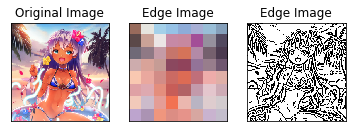

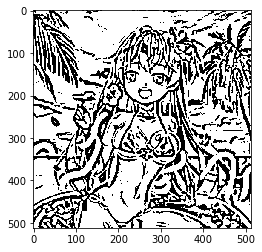

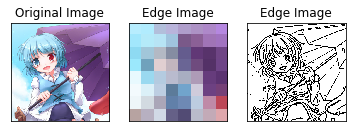

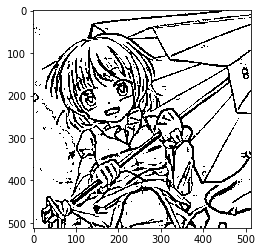

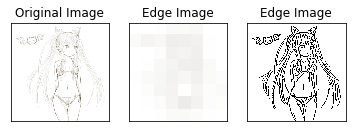

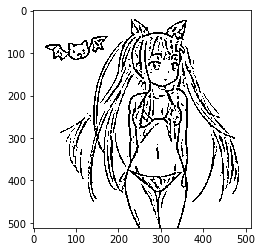

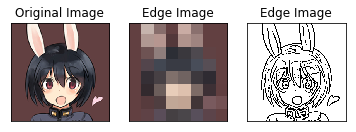

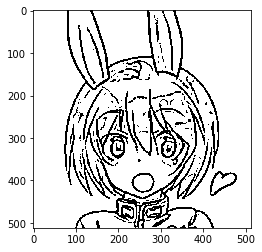

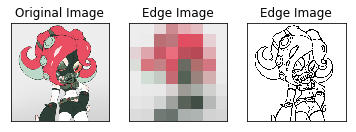

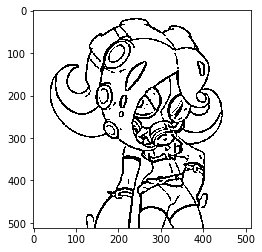

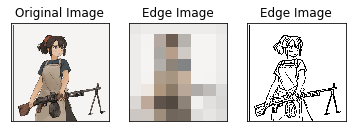

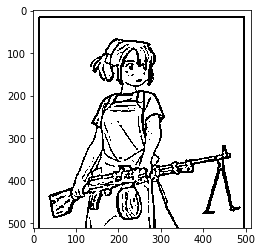

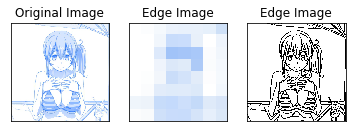

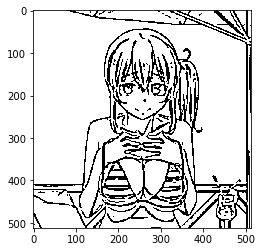

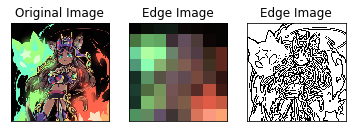

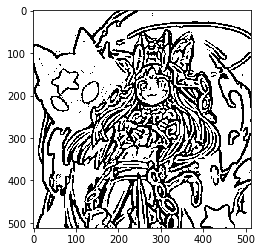

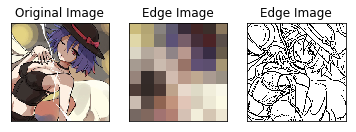

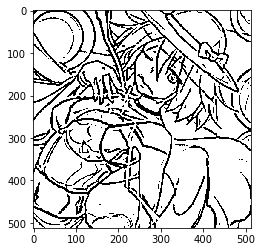

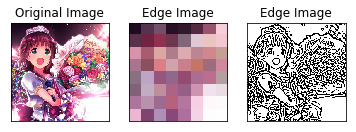

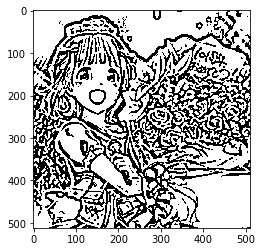

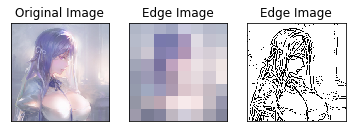

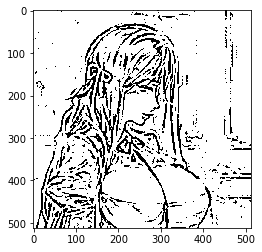

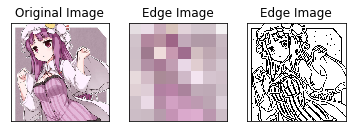

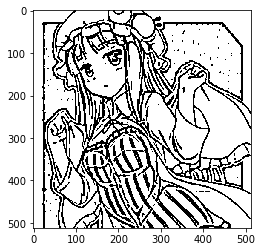

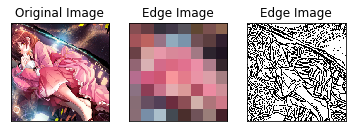

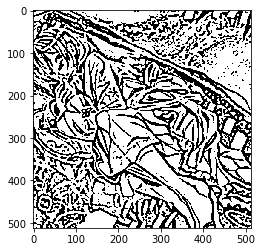

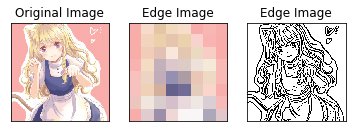

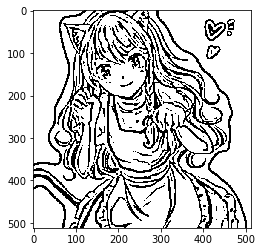

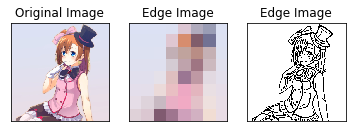

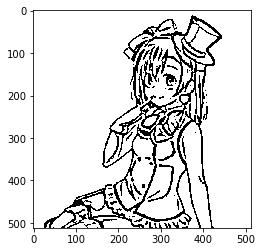

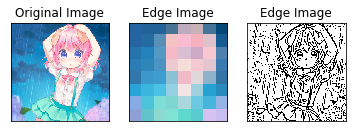

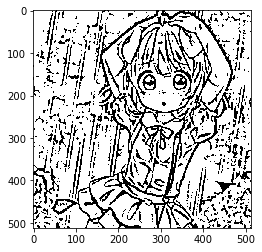

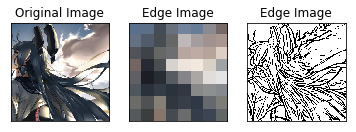

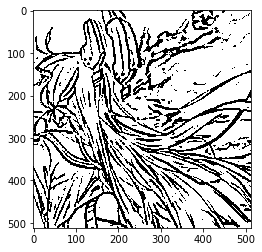

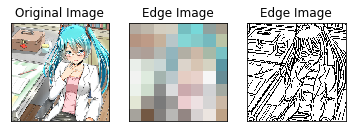

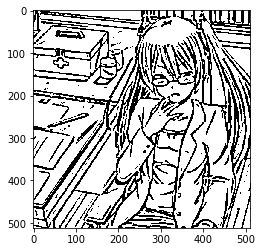

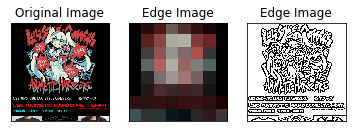

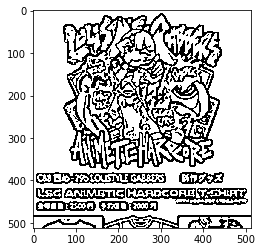

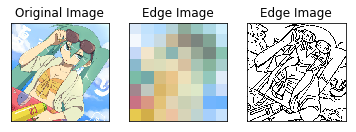

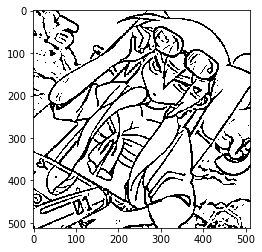

In [164]:
data = glob(IMAGES_PATH+"*.jpg")
print (data[0])
for imname in data[:20]:
    plot_img_array(plot_edge(imname, median=True, blur=True))

## Sobel Edge Detection

In [115]:
img_path = get_random_image_path(IMAGES_PATH)
print(img_path)

/home/bfortuner/workplace/deepcolor/imgs/1636.jpg


In [109]:
img = cv2.imread(img_path)
blurred = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise

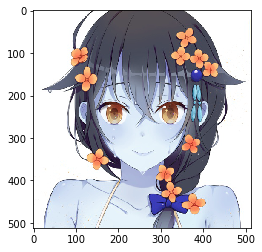

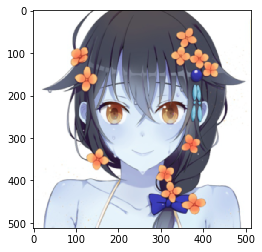

In [116]:
plot_img_array(img)
plot_img_array(blurred)

In [117]:
def edgedetect(channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)

    sobel[sobel > 255] = 255; # Some values seem to go above 255. However RGB channels has to be within 0-255
    return sobel

In [124]:
edgeImg = np.max( np.array([ edgedetect(blurred[:,:, 0]), edgedetect(blurred[:,:, 1]), edgedetect(blurred[:,:, 2]) ]), axis=0 )

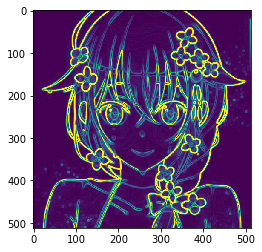

In [125]:
plot_img_array(edgeImg)

In [126]:
mean = np.mean(edgeImg);
# Zero any value that is less than mean. This reduces a lot of noise.
edgeImg[edgeImg <= mean] = 0;

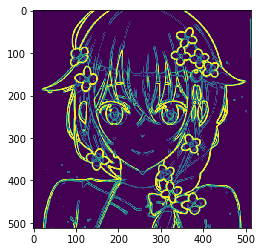

In [127]:
plot_img_array(edgeImg)

In [128]:
def findSignificantContours (img, edgeImg):
    image, contours, heirarchy = cv2.findContours(edgeImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find level 1 contours
    level1 = []
    for i, tupl in enumerate(heirarchy[0]):
        # Each array is in format (Next, Prev, First child, Parent)
        # Filter the ones without parent
        if tupl[3] == -1:
            tupl = np.insert(tupl, 0, [i])
            level1.append(tupl)



    # From among them, find the contours with large surface area.
    significant = []
    tooSmall = edgeImg.size * 5 / 100 # If contour isn't covering 5% of total area of image then it probably is too small
    for tupl in level1:
        contour = contours[tupl[0]];
        area = cv2.contourArea(contour)
        if area > tooSmall:
            significant.append([contour, area])

            # Draw the contour on the original image
            cv2.drawContours(img, [contour], 0, (0,255,0),2, cv2.LINE_AA, maxLevel=1)

    significant.sort(key=lambda x: x[1])
    #print ([x[1] for x in significant]);
    return [x[0] for x in significant];

In [129]:
edgeImg_8u = np.asarray(edgeImg, np.uint8)

# Find contours
significant = findSignificantContours(img, edgeImg_8u)

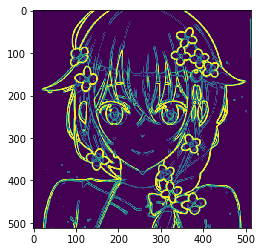

In [131]:
plot_img_array(edgeImg_8u)

In [132]:
# Mask
mask = edgeImg.copy()
mask[mask > 0] = 0
cv2.fillPoly(mask, significant, 255)
# Invert mask
mask = np.logical_not(mask)

#Finally remove the background
img[mask] = 0;

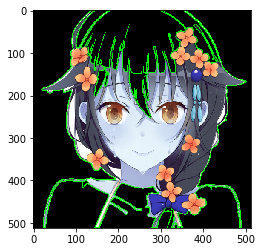

In [133]:
plot_img_array(img)